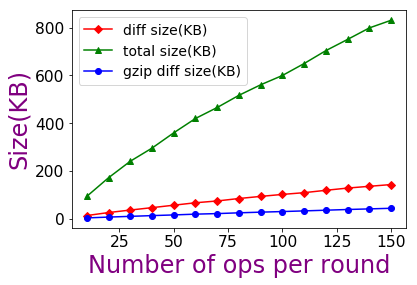

In [61]:
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
data = pd.read_csv('canvas_offline.csv')
x = np.array(data['num ops per round'])
y = np.array(data['diff size (KB)'])
y1 = np.array(data['total size (KB)'])
y2 = np.array(data['gzip diff size (KB)'])
plt.rcParams.update({'font.size': 15.5})
area = np.pi*10
plt.plot(x, y, label = 'diff size(KB)',color = 'red',marker = 'D')
plt.plot(x, y1, label = 'total size(KB)',color = 'green',marker = '^')
plt.plot(x, y2, label = 'gzip diff size(KB)',color = 'blue',marker = 'o')
plt.xlabel('Number of ops per round',fontsize=24,color='purple')
plt.ylabel('Size(KB)',fontsize=24,color='purple')
plt.legend(loc='upper left',prop={'size': 14})

plt.savefig('Fig-canvas_offline.pdf',bbox_inches='tight')
plt.show()
plt.close()

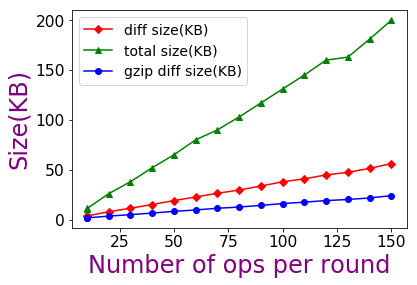

In [62]:
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
data = pd.read_csv('rbset_offline.csv')
plt.rcParams.update({'font.size': 15.5})
x = np.array(data[' nops per round'])
y = np.array(data[' diff in KB'])
y1 = np.array(data[' total in KB'])
y2 = np.array(data[' gzip diff in KB'])
area = np.pi*10
plt.plot(x, y, label = 'diff size(KB)',color = 'red',marker = 'D')
plt.plot(x, y1, label = 'total size(KB)',color = 'green',marker = '^')
plt.plot(x, y2, label = 'gzip diff size(KB)',color = 'blue',marker = 'o')
plt.xlabel('Number of ops per round',fontsize=24,color='purple')
plt.ylabel('Size(KB)',fontsize=24,color='purple')
plt.legend(loc='upper left',prop={'size': 14})
plt.savefig('Fig-rbset_offline.pdf',bbox_inches='tight')
plt.show()
plt.close()

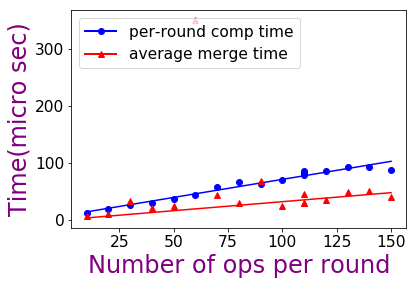

In [63]:
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.lines import Line2D
data = pd.read_csv('canvas_online.csv')
plt.rcParams.update({'font.size': 15.5})
x = np.array(data[' n_ops_per_round'])
y = np.array(data[' per-round comp time'])
y1 = np.array(data[' average merge time'])
area = np.pi*10
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x,y1)
line1 = -10*slope1*x
plt.plot(x,y,'o', x, line,label = 'per-round comp time',color="blue")
plt.plot(x,y1,'^', x, line1,label = 'average merge time',color="red")
colors = ['blue', 'red']
markers= ['o','^']
lines = [Line2D([0], [0], color=colors[0],marker = markers[0], linewidth=2),Line2D([0], [0], color=colors[1],marker = markers[1], linewidth=2)]
labels = ['per-round comp time', 'average merge time']
plt.legend(lines, labels,loc='upper left')
plt.xlabel('Number of ops per round',fontsize=24,color='purple')
plt.ylabel('Time(micro sec)',fontsize=24,color='purple')
plt.savefig('Fig-canvas_online.pdf',bbox_inches='tight')
plt.show()
plt.close()


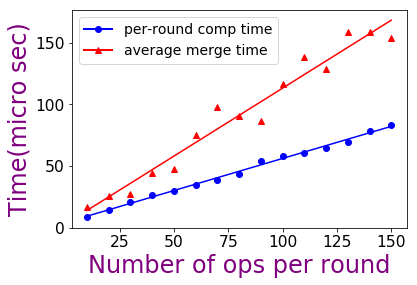

In [64]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.lines import Line2D
data = pd.read_csv('rbset_online.csv')
plt.rcParams.update({'font.size': 15.5})
x = np.unique(np.array(data[' n_ops_per_round']))
grouped = data.groupby(' n_ops_per_round')
y = np.array(grouped[' per-round comp time'].agg(np.mean))
y1 = np.array(grouped[' average merge time'].agg(np.mean))
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x,y1)
line1 = slope1*x+intercept1
plt.plot(x,y,'o', x, line,label = 'per-round comp time',color = "blue")
plt.plot(x,y1,'^', x, line1,label = 'average merge time',color = "red")
plt.ylim(ymin=0)
#plt.title('rbset_online',fontsize=24,color='purple')
plt.xlabel('Number of ops per round',fontsize=24,color='purple')
plt.ylabel('Time(micro sec)',fontsize=24,color='purple')
colors = ['blue', 'red']
markers= ['o','^']
lines = [Line2D([0], [0], color=colors[0],marker = markers[0], linewidth=2),Line2D([0], [0], color=colors[1],marker = markers[1], linewidth=2)]
labels = ['per-round comp time', 'average merge time']
plt.legend(lines, labels,loc='upper left',prop={'size': 14})
plt.savefig('Fig-rbset_online.pdf',bbox_inches='tight')
plt.show()
plt.close()

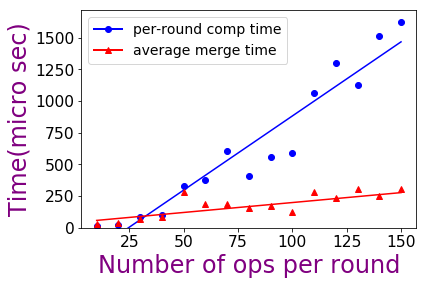

In [65]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.lines import Line2D

data = pd.read_csv('mlist_online.csv')
plt.rcParams.update({'font.size': 15.5})
x = np.unique(np.array(data[' n_ops_per_round']))
grouped = data.groupby(' n_ops_per_round')
y = np.array(grouped[' per-round comp time'].agg(np.mean))
y1 = np.array(grouped[' average merge time'].agg(np.mean))
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x,y1)
line1 = 0.9 * slope1*x+intercept1
plt.plot(x,y,'o', x, line,label = 'per-round comp time',color = "blue")
plt.plot(x,y1,'^', x, line1,label = 'average merge time',color = "red")
plt.ylim(ymin=0)
plt.xlabel('Number of ops per round',fontsize=24,color='purple')
plt.ylabel('Time(micro sec)',fontsize=24,color='purple')
colors = ['blue', 'red']
markers= ['o','^']
lines = [Line2D([0], [0], color=colors[0],marker = markers[0], linewidth=2),Line2D([0], [0], color=colors[1],marker = markers[1], linewidth=2)]
labels = ['per-round comp time', 'average merge time']
plt.legend(lines, labels,loc='upper left',prop={'size': 14})
plt.savefig('Fig-mlist_online.pdf',bbox_inches='tight')
plt.show()
plt.close()

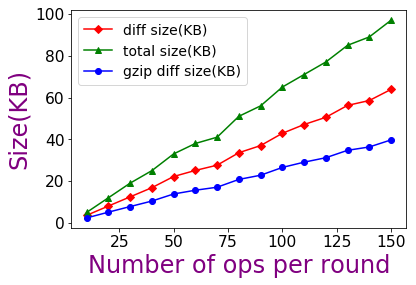

In [66]:
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
data = pd.read_csv('mlist_offline.csv')
plt.rcParams.update({'font.size': 15.5})
#print data[' nops per round']
x = np.array(data[' nops per round'])
y = np.array(data[' diff in KB'])
y1 = np.array(data[' total in KB'])
y2 = np.array(data[' gzip diff in KB'])
area = np.pi*10
#plt.scatter(x, y, s=area, color = 'purple', alpha=0.5)
plt.plot(x, y, label = 'diff size(KB)',color = 'red',marker = 'D')
plt.plot(x, y1, label = 'total size(KB)',color = 'green',marker = '^')
plt.plot(x, y2, label = 'gzip diff size(KB)',color = 'blue',marker = 'o')
#plt.title('mlist_offline',fontsize=24,color='purple')
plt.xlabel('Number of ops per round',fontsize=24,color='purple')
plt.ylabel('Size(KB)',fontsize=24,color='purple')
plt.legend(loc='upper left',prop={'size': 14})
plt.savefig('Fig-mlist_offline.pdf',bbox_inches='tight')
plt.show()
plt.close()

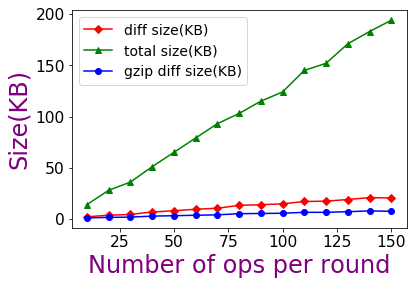

In [67]:
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
data = pd.read_csv('diff_results.csv')
plt.rcParams.update({'font.size': 15.5})
x = np.array(data[' no_op_r'])
y = np.array(data[' diff size (KB)'])
y1 = np.array(data[' total size (KB)'])
y2 = np.array(data[' gzip diff size (KB)'])
area = np.pi*10
#plt.scatter(x, y, s=area, color = 'purple', alpha=0.5)
plt.plot(x, y, label = 'diff size(KB)',color = 'red',marker = 'D')
plt.plot(x, y1, label = 'total size(KB)',color = 'green',marker = '^')
plt.plot(x, y2, label = 'gzip diff size(KB)',color = 'blue',marker = 'o')
#plt.title('mlist_offline',fontsize=24,color='purple')
plt.xlabel('Number of ops per round',fontsize=24,color='purple')
plt.ylabel('Size(KB)',fontsize=24,color='purple')
plt.legend(loc='upper left',prop={'size': 14})
plt.savefig('Fig-Left-list.pdf',bbox_inches='tight')
plt.show()
plt.close()

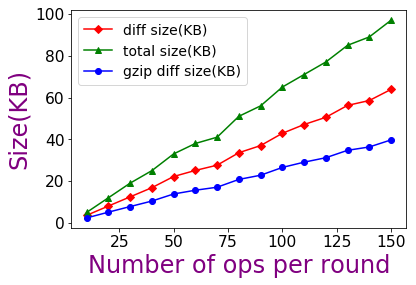

In [68]:
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15.5})
data = pd.read_csv('diff_results_part2.csv')
x = np.array(data[' nops per round'])
y = np.array(data[' diff in KB'])
y1 = np.array(data[' total in KB'])
y2 = np.array(data[' gzip diff in KB'])
area = np.pi*100
plt.plot(x, y, label = 'diff size(KB)',color = 'red',marker = 'D')
plt.plot(x, y1, label = 'total size(KB)',color = 'green',marker = '^')
plt.plot(x, y2, label = 'gzip diff size(KB)',color = 'blue',marker = 'o')
#plt.title('mlist_offline',fontsize=24,color='purple')
plt.xlabel('Number of ops per round',fontsize=24,color='purple')
plt.ylabel('Size(KB)',fontsize=24,color='purple')
plt.legend(loc='upper left',prop={'size': 14})
plt.savefig('Fig-list.pdf',bbox_inches='tight')
plt.show()
plt.close()